In [24]:
feature_names

['MONTH',
 'DAY',
 'YEAR',
 'HOUR',
 'TEMP',
 'HUMID',
 'SOLAR',
 'WIND',
 'WBE',
 'WBCW',
 'WBHW']

## **Decision tree**

In [1]:
#WORKING - DATA

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm





In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.1 MB/s eta 0:00:00


In [3]:
import xgboost
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=6705efa70d80c1a69826fb2ec3357d31cbdfffb261fd4835bc769c02155b0a71
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [5]:
import eli5
from eli5.sklearn import PermutationImportance

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

data=pd.read_excel(r"/content/drive/MyDrive/DATA-building.xlsx")
print(data)


      MONTH  DAY  YEAR  HOUR  TEMP   HUMID  SOLAR  WIND     WBE  WBCW  WBHW
0         9    1    89   200  81.9  0.0184    0.0  7.62  496.07   7.2   0.4
1         9    1    89   300  80.7  0.0187    0.0  7.94  497.06   7.1   0.5
2         9    1    89   400  79.7  0.0194    0.0  7.72  496.67   7.1   0.5
3         9    1    89   500  79.0  0.0197    0.1  6.08  494.54   7.1   0.6
4         9    1    89   600  78.9  0.0199    0.1  5.68  498.09   7.0   0.6
...     ...  ...   ...   ...   ...     ...    ...   ...     ...   ...   ...
2921     12   31    89  1900  47.6  0.0025    1.7  3.66  435.79   3.8   4.4
2922     12   31    89  2000  46.5  0.0026    1.8  2.38  431.14   3.8   4.8
2923     12   31    89  2100  46.1  0.0027    2.0  2.11  431.59   3.7   4.2
2924     12   31    89  2200  46.3  0.0028    2.0  2.34  435.44   3.8   4.4
2925     12   31    89  2300  45.2  0.0028    2.0  3.22  435.74   3.8   4.7

[2926 rows x 11 columns]


In [8]:

scaler = MinMaxScaler()

df = scaler.fit_transform(data)  #conti. formata getiriyor

dataset = df

x1, y1 = dataset[:, 0:8], dataset[:, 8:9]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)

# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1,shuffle=True)   #30% test data, 70% training data

print(x_test.shape)
print(y_test.shape)


#print(x_train)
#print(y_train)

(878, 8)
(878, 1)


In [ ]:
x1

In [9]:


dt_regressor = DecisionTreeRegressor(random_state = 1)
dt_regressor.fit(x_train,y_train)
#Predicting using test set
y_pred_test = dt_regressor.predict(x_test)

y_pred_train = dt_regressor.predict(x_train)

In [10]:
mae=metrics.mean_absolute_error(y_test, y_pred_test)
mse=metrics.mean_squared_error(y_test, y_pred_test)
r2=metrics.r2_score(y_test, y_pred_test)

#print(y_pred-y_test)

# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

#Prediction using training set
y_pred = dt_regressor.predict(x_train)
mae=metrics.mean_absolute_error(y_train, y_pred_train)
mse=metrics.mean_squared_error(y_train, y_pred_train)
r2=metrics.r2_score(y_train, y_pred_train)




# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

Test R2 square: 0.6252796523190256
Test MAE:  0.07979390446063776
Test MSE:  0.023556557242489187
Train R2 square: 1.0
Train MAE:  0.0
Train MSE:  0.0


In [11]:
mae=metrics.mean_absolute_error(y_test, y_pred_test)
mse_wbe=metrics.mean_squared_error(y_test, y_pred_test)
r2=metrics.r2_score(y_test, y_pred_test)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbe)

Test R2 square: 0.6252796523190256
Test MAE:  0.07979390446063776
Test MSE:  0.023556557242489187


In [ ]:
mae=metrics.mean_absolute_error(y_test[:,1], y_pred_test[:,1])
mse_wbcw=metrics.mean_squared_error(y_test[:,1],y_pred_test[:,1])
r2=metrics.r2_score(y_test[:,1], y_pred_test[:,1])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbcw)

In [ ]:
mae=metrics.mean_absolute_error(y_test[:,2], y_pred_test[:,2])
mse_wbhw=metrics.mean_squared_error(y_test[:,2], y_pred_test[:,2])
r2=metrics.r2_score(y_test[:,2], y_pred_test[:,2])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbhw)

In [15]:
feature_names = data.columns.tolist()

## Feature importance


In [16]:
feature_names = data.columns.tolist()

<Axes: >

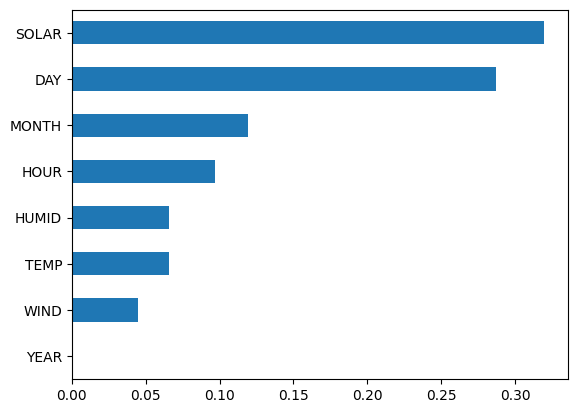

In [17]:
feat_importances = pd.Series(dt_regressor.feature_importances_, index=feature_names[:8]).sort_values(ascending=True)
feat_importances.tail(20).plot(kind='barh')

https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: 0, Score: 0.11925
Feature: 1, Score: 0.28734
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.09693
Feature: 4, Score: 0.06580
Feature: 5, Score: 0.06602
Feature: 6, Score: 0.31979
Feature: 7, Score: 0.04487


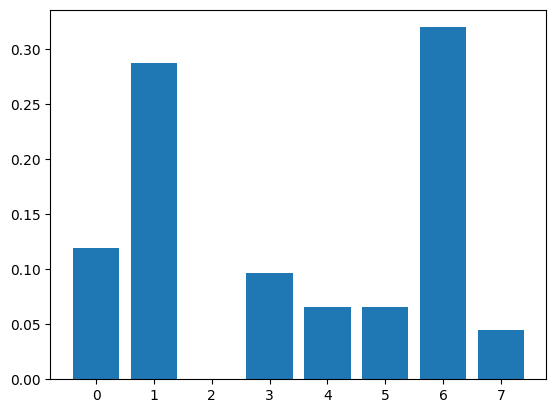

In [18]:

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# get importance
importance = dt_regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, label=feature_names[:8])
pyplot.show()

## SHAP

In [19]:
feature_names = data.columns.tolist()

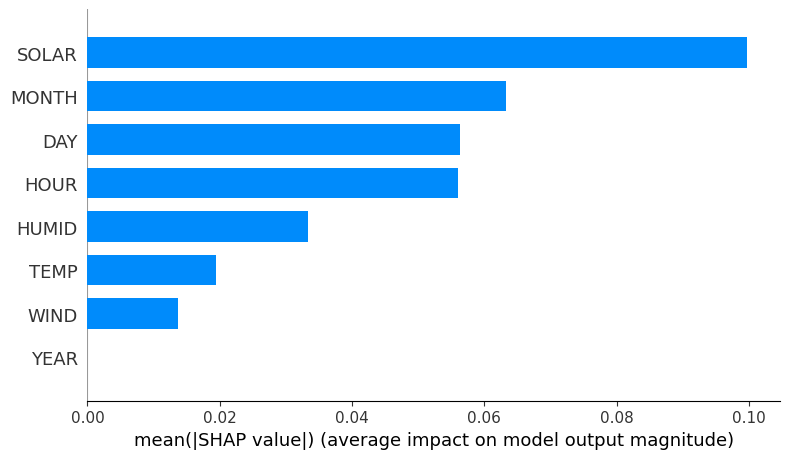

In [20]:
explainer = shap.TreeExplainer(dt_regressor)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type = 'bar', feature_names=feature_names[:8])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


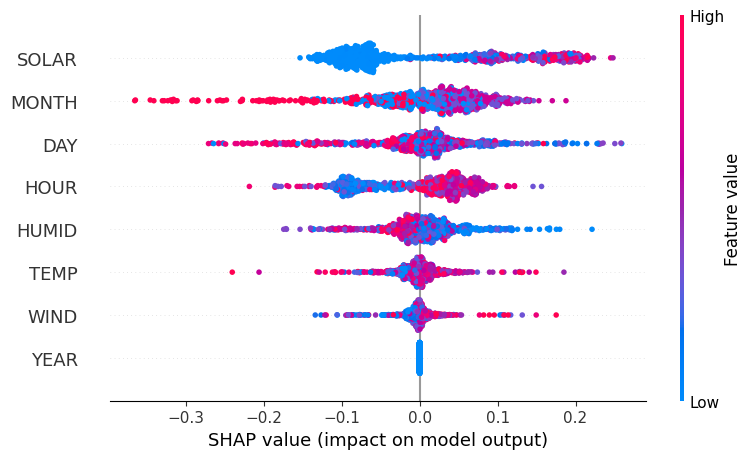

In [21]:
shap.summary_plot(shap_values, x_test,  feature_names=feature_names[:8])

In [22]:
feature_names = data.columns.tolist()

In [23]:
feature_names

['MONTH',
 'DAY',
 'YEAR',
 'HOUR',
 'TEMP',
 'HUMID',
 'SOLAR',
 'WIND',
 'WBE',
 'WBCW',
 'WBHW']

In [25]:
# Train
#perm = PermutationImportance(dt_regressor, scoring = 'roc_auc', random_state=1984).fit(x_train, y_train)
eli5.show_weights(dt_regressor, feature_names = feature_names[:8])
# Test
#perm = PermutationImportance(dt_regressor, scoring = 'roc_auc', random_state=1984).fit(x_test, y_test)
#eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Output hidden; open in https://colab.research.google.com to view.

## CORRELATION MATRIX

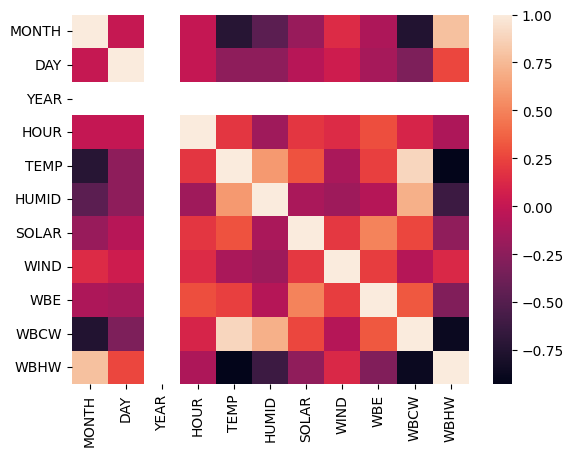

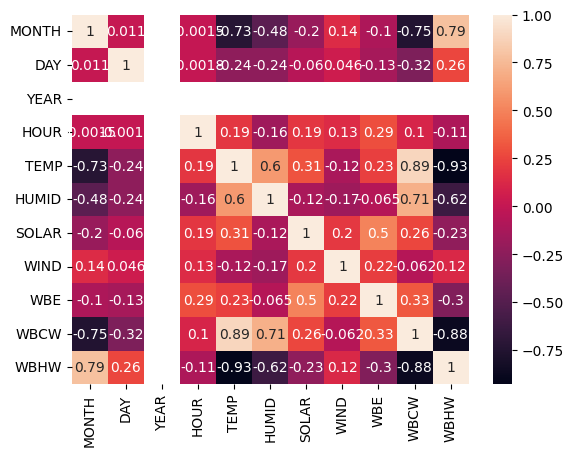

In [26]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb



# plotting correlation heatmap
dataplot=sb.heatmap(data.corr())

# displaying heatmap
mp.show()

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [27]:
correlation = data. corr ()
correlation. style. background_gradient (cmap = 'BrBG')

All-NaN slice encountered
All-NaN slice encountered


,MONTH,DAY,YEAR,HOUR,TEMP,HUMID,SOLAR,WIND,WBE,WBCW,WBHW
MONTH,1.000000,0.011165,nan,-0.001467,-0.728253,-0.476076,-0.196610,0.135238,-0.103684,-0.751576,0.787857
DAY,0.011165,1.000000,nan,-0.001823,-0.240807,-0.236734,-0.060375,0.046229,-0.133997,-0.317532,0.255320
YEAR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HOUR,-0.001467,-0.001823,nan,1.000000,0.186622,-0.164869,0.187236,0.134838,0.290115,0.101899,-0.105223
TEMP,-0.728253,-0.240807,nan,0.186622,1.000000,0.598908,0.305286,-0.117537,0.230973,0.892619,-0.928421
HUMID,-0.476076,-0.236734,nan,-0.164869,0.598908,1.000000,-0.118850,-0.174018,-0.065127,0.705647,-0.620805
SOLAR,-0.196610,-0.060375,nan,0.187236,0.305286,-0.118850,1.000000,0.196701,0.497116,0.256578,-0.227943
WIND,0.135238,0.046229,nan,0.134838,-0.117537,-0.174018,0.196701,1.000000,0.219606,-0.062493,0.123812
WBE,-0.103684,-0.133997,nan,0.290115,0.230973,-0.065127,0.497116,0.219606,1.000000,0.328783,-0.302285
WBCW,-0.751576,-0.317532,nan,0.101899,0.892619,0.705647,0.256578,-0.062493,0.328783,1.000000,-0.875586


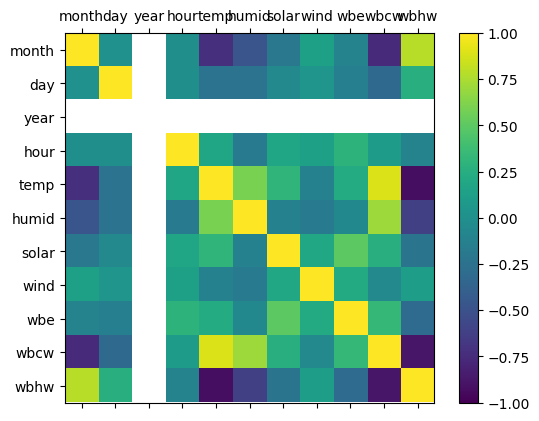

In [28]:
from matplotlib import pyplot
from pandas import read_csv
import numpy

names = ['month', 'day', 'year', 'hour', 'temp', 'humid', 'solar', 'wind' ,"wbe", 'wbcw','wbhw']

correlations = data.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

## PARTIAL DEPENDENCE PLOTS

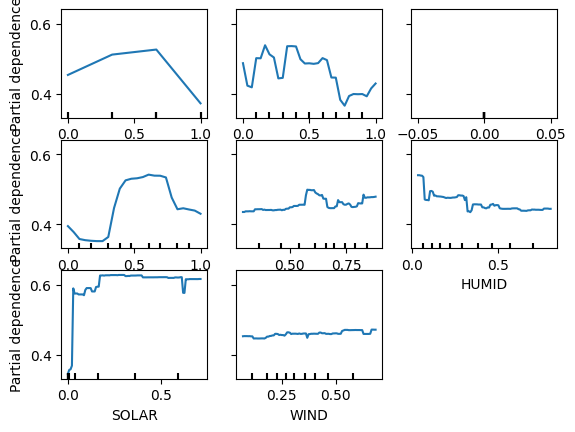

In [32]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

#X, y = make_hastie_10_2(random_state=0)
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#     max_depth=1, random_state=0).fit(X, y)
features = [0, 1, 2, 3, 4, 5, 6, 7]
PartialDependenceDisplay.from_estimator(dt_regressor, x_train, features,feature_names=feature_names[:8])

In [ ]:
features = [ 3, 4, 5]
PartialDependenceDisplay.from_estimator(dt_regressor, x_train, features, feature_names=feature_names[2:5])

ValueError: ignored

In [ ]:
c=feature_names[6:8]

In [ ]:
features = [ 6, 7]
PartialDependenceDisplay.from_estimator(dt_regressor, x_train, features, feature_names=c )

ValueError: ignored

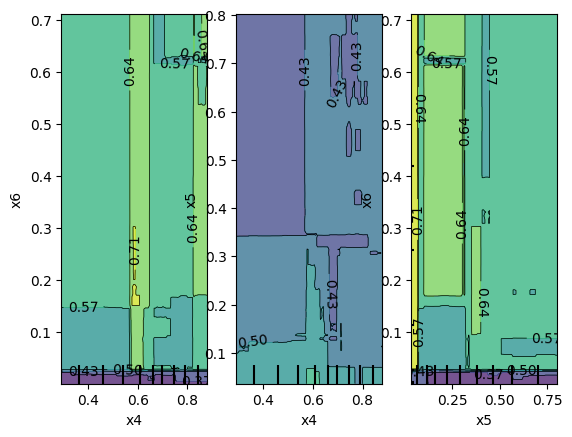

In [33]:
features = [(4,6),(4,5), (5,6)]
PartialDependenceDisplay.from_estimator(dt_regressor, x_train, features)

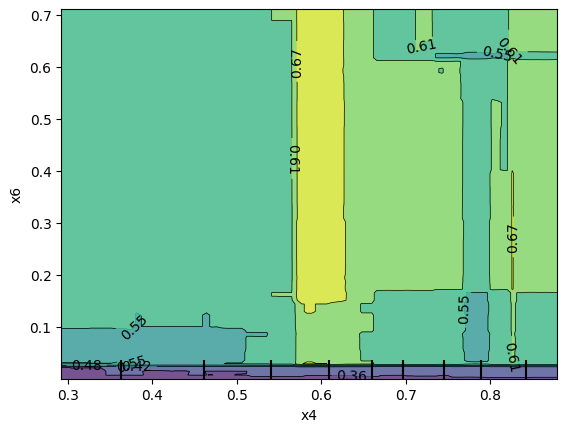

In [34]:
PartialDependenceDisplay.from_estimator(dt_regressor, x_train,[(4,6)])

In [35]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

ICE PLOT ,

However, unlike a PDP, which shows the average effect of the input feature, an ICE plot visualizes the dependence of the prediction on a feature for each sample separately with one line per sample.

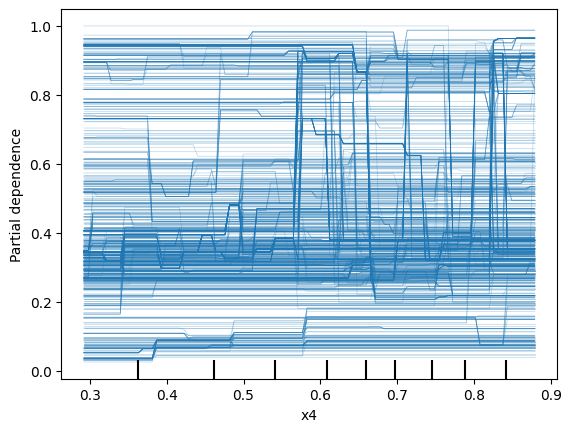

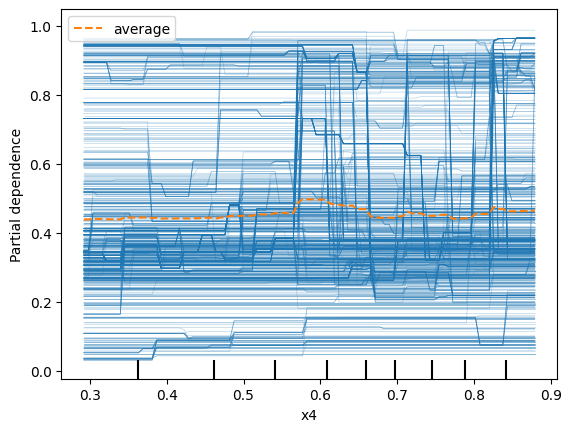

In [ ]:
#X, y = make_hastie_10_2(random_state=0)
#>>> clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#...     max_depth=1, random_state=0).fit(X, y)
features = [4]
PartialDependenceDisplay.from_estimator(dt_regressor, x_train, features,
     kind='individual')
PartialDependenceDisplay.from_estimator(dt_regressor, x_train, features,
     kind='both')

## ALE


In [36]:
pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-b1phc3c0/alepython_13beecdfcc5f465cb84e1bfcd355708a
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-b1phc3c0/alepython_13beecdfcc5f465cb84e1bfcd355708a
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.0 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15017 sha256=683bd9d9b5918ae9e0d4450eaa8814b482f5564d2a6c99be591bf1639559a817
  Stored in directory: /tmp/pip-ephem-wheel-cache-_k_v30ds/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython


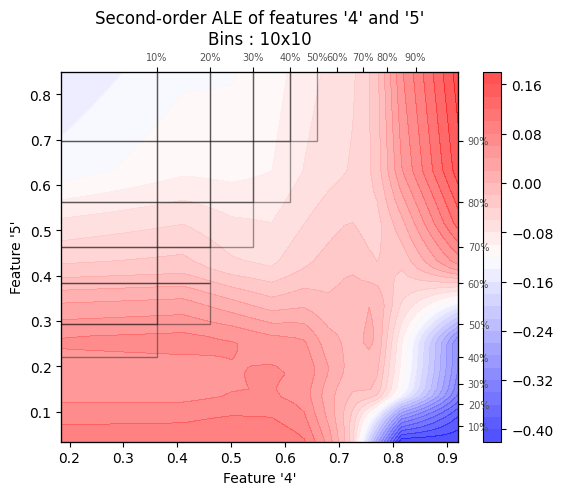

<Axes: title={'center': "Second-order ALE of features '4' and '5'\nBins : 10x10"}, xlabel="Feature '4'", ylabel="Feature '5'">

In [37]:
from alepython import ale_plot
# Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
x_train=pd.DataFrame(x_train)
features = [ 4,5]
ale_plot(dt_regressor, x_train, features,  monte_carlo=True)

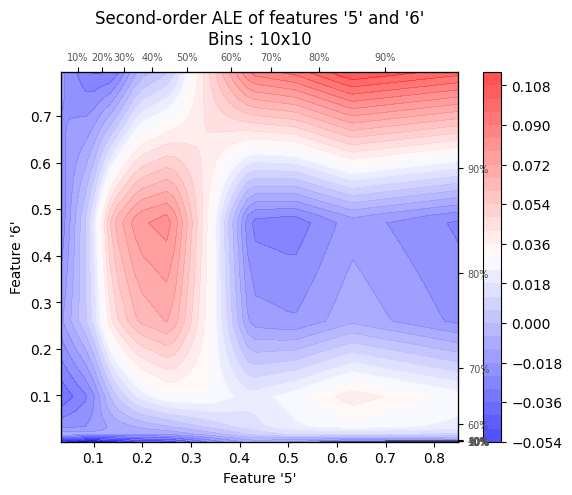

<Axes: title={'center': "Second-order ALE of features '5' and '6'\nBins : 10x10"}, xlabel="Feature '5'", ylabel="Feature '6'">

In [38]:
features = [ 5,6]
ale_plot(dt_regressor, x_train, features,  monte_carlo=True)

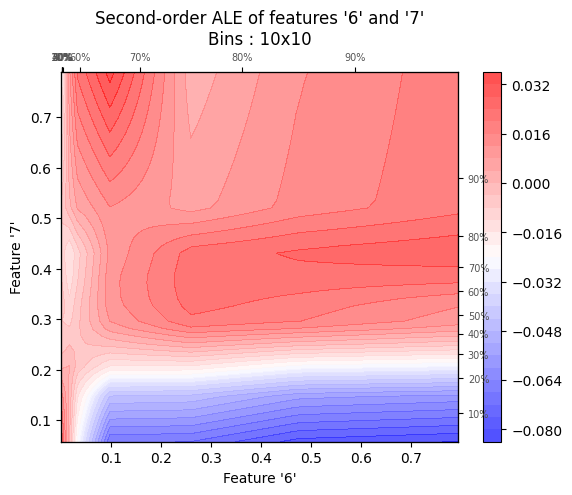

<Axes: title={'center': "Second-order ALE of features '6' and '7'\nBins : 10x10"}, xlabel="Feature '6'", ylabel="Feature '7'">

In [76]:
features = [ 6,7]
ale_plot(dt_regressor, x_train, features,  monte_carlo=True)

## Mutual info classification

In [39]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([0.23090873, 0.25492691, 0.01928711, 0.60315729, 0.23613749,
       0.16146148, 0.38851862, 0.04696467])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = feature_names[:8]
mutual_info.sort_values(ascending=False)

HOUR     0.603157
SOLAR    0.388519
DAY      0.254927
TEMP     0.236137
MONTH    0.230909
HUMID    0.161461
WIND     0.046965
YEAR     0.019287
dtype: float64

<Axes: >

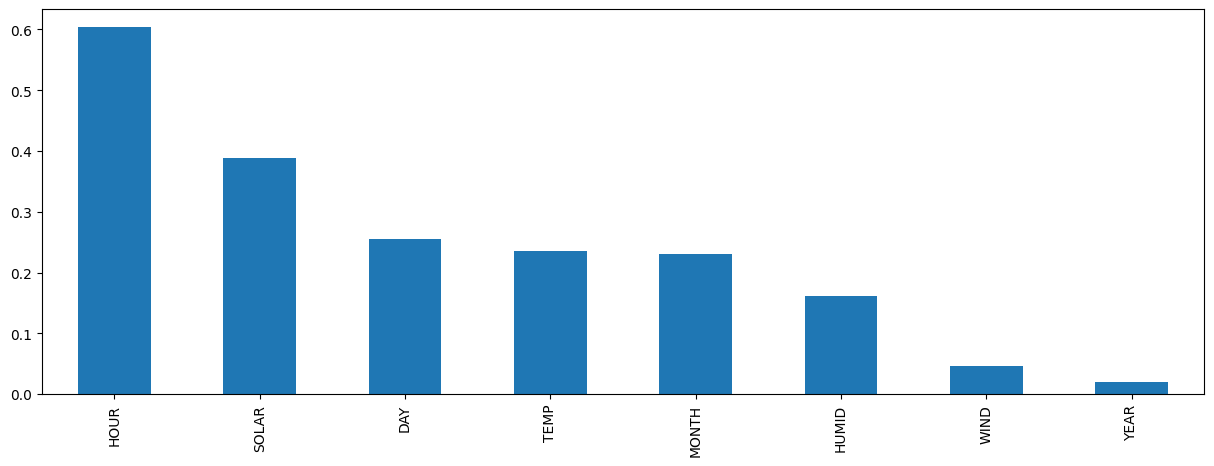

In [41]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


about 60% of the given output comes from hour

In [42]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(x_train, y_train)
selected_top_columns.get_support()


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([False, False, False,  True, False, False,  True, False])

## LASSO



In [43]:
from sklearn.model_selection import train_test_split
data_train, data_val = train_test_split(y_train, test_size = 0.2, random_state = 2)

In [44]:
#Classifying Independent and Dependent Features
#_______________________________________________
#Dependent Variable
Y_train = dataset[:,8:9]
#Independent Variables
X_train = dataset[:,:8]
#Independent Variables for Test Set
X_test = dataset[:,:8]

In [45]:
def score(y_pred, y_true):
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score
 # actual_cost = list(data_val['COST'])
  #actual_cost = np.asarray(actual_cost)


In [46]:
#Lasso Regression


from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso()
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,Y_train)
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass, y_test))





Lasso SCORE :  0.9278282342382872


In [47]:
lasso_reg.coef_

array([-0., -0.,  0.,  0.,  0., -0.,  0.,  0.])

In [ ]:
#checking the magnitude of coefficients
predictors = feature_names[:8]
coef = Series(lasso_reg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

The Lasso Regression attained an accuracy of 92.5% with the given Dataset.

In [ ]:
eli5.show_weights(dt_regressor, feature_names = feature_names[:8])


Weight?,Feature
+0.464,<BIAS>


In [53]:

# importing basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

#train = pd.read_csv('Train.csv')
#test = pd.read_csv('test.csv')
# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
#splitting into training and cv for cross validation
#X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
#x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)
#training the model
lreg.fit(x_train,y_train)
#predicting on cv
pred = lreg.predict(x_test)
#calculating mse
mse = np.mean((pred - y_test)**2)

In [ ]:
x_train=DataFrame(x_train)
coeff = feature_names[:8]

coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff



In [55]:
#calculating r-square
lreg.score(x_test,y_test)

0.33343914291173626

In [ ]:
pred

Text(0.5, 1.0, 'Residual plot')

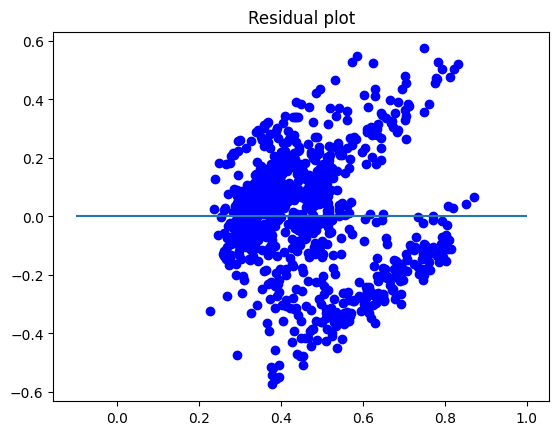

In [91]:
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin= -0.1, xmax=1)
plt.title('Residual plot')

<Axes: title={'center': 'Modal Coefficients'}>

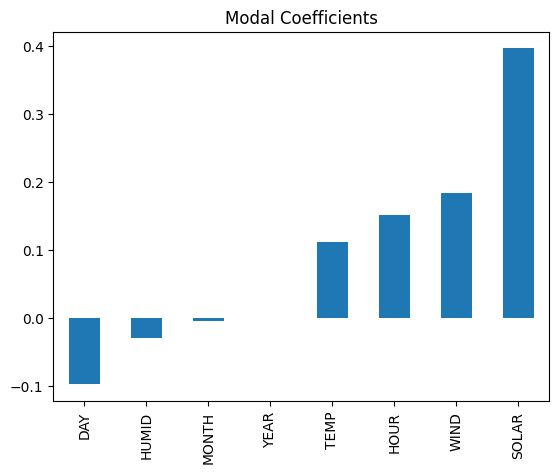

In [52]:
predictors = feature_names[:8]
coef = Series((lreg.coef_).flatten(), predictors ).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [56]:
eli5.show_weights(lreg, feature_names = feature_names[:8])

Weight?,Feature
+0.396,SOLAR
+0.254,<BIAS>
+0.184,WIND
+0.151,HOUR
+0.112,TEMP
+0.000,YEAR
-0.004,MONTH
-0.030,HUMID
-0.097,DAY


## residual error

In [57]:
y_pred_test


array([0.26298669, 0.25599819, 0.28050625, 0.24345432, 0.39011627,
       0.27741459, 0.06542462, 0.28949147, 0.3884899 , 0.33591512,
       0.53780878, 0.26003993, 0.33599561, 0.34572154, 0.21448584,
       0.28042576, 0.05722843, 0.84795982, 0.18917266, 0.3205694 ,
       0.54782456, 0.61759686, 0.75652957, 0.21670799, 0.22483978,
       0.68678945, 0.87143731, 0.8777495 , 0.53441113, 0.87449682,
       0.30726868, 0.98285079, 0.81185794, 0.53540951, 0.37589771,
       0.32775113, 0.4124988 , 0.32899103, 0.19701459, 0.81620562,
       0.34760556, 0.86969823, 0.47864804, 0.3752214 , 0.26936331,
       0.32862064, 0.28371066, 0.88791019, 0.29416123, 0.37353066,
       0.39908537, 0.83617276, 0.4423368 , 0.73171556, 0.1875141 ,
       0.35412708, 0.3688609 , 0.90731376, 0.73851085, 0.26936331,
       0.30892724, 0.09595504, 0.44175711, 0.54822713, 0.47079   ,
       0.75466168, 0.35227528, 0.24110335, 0.3036617 , 0.31424108,
       0.90016425, 0.15653279, 0.53877491, 0.30205145, 0.36919

In [58]:
y_test=y_test.flatten()
print(y_test)

[0.9170558  0.22012174 0.54539305 0.1489807  0.38359472 0.25680333
 0.06516698 0.2891372  0.3636759  0.5135906  0.60033494 0.33230814
 0.3623716  0.3395382  0.21720718 0.1989952  0.0507069  0.5293871
 0.23796335 0.64020485 0.60638946 0.60848284 0.90187114 0.2243084
 0.24781811 0.6857589  0.90251523 0.8905832  0.5086471  0.9214035
 0.3725645  0.95982414 0.8344015  0.2636952  0.536907   0.38433546
 0.49077323 0.3130978  0.19930115 0.83520657 0.33184117 0.872178
 0.2719075  0.4867798  0.26952434 0.7356929  0.30097258 0.9020643
 0.32969952 0.5286142  0.41170976 0.29057035 0.93525165 0.8130012
 0.09450582 0.33986023 0.38913402 0.8170107  0.9244308  0.26646486
 0.36713794 0.09492448 0.4530933  0.5424624  0.33501336 0.7966088
 0.55080354 0.23809217 0.3194422  0.31767094 0.934672   0.15559885
 0.5177933  0.707288   0.36325723 0.81201893 0.45156357 0.8086213
 0.22459824 0.9157193  0.3991659  0.8852533  0.47441307 0.37921485
 0.04664906 0.8885221  0.38940775 0.3472513  0.3688126  0.33979583
 0.6

In [59]:
a=np.subtract(y_pred_test, y_test)
print(a.shape)

(878,)


Text(0.5, 1.0, 'Residual plot')

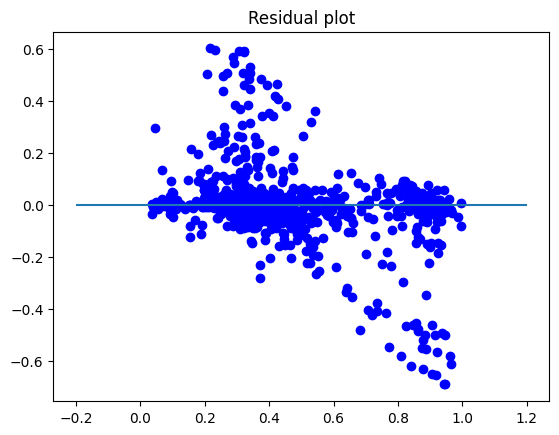

In [60]:

x_plot = plt.scatter(y_test, np.subtract(y_pred_test, y_test), c='b')
plt.hlines(y=0, xmin= -0.2, xmax=1.2)
plt.title('Residual plot')